In [1]:
## Anyone who has booked a flight ticket knows how unexpectedly the prices vary. 
## The cheapest available ticket on a given flight gets more and less expensive over time. This usually happens as 
## an attempt to maximize revenue based on -
## 1. Time of purchase patterns (making sure last-minute purchases are expensive)
## 2. Keeping the flight as full as they want it (raising prices on a flight which is filling up in order to reduce sales and hold back inventory for those expensive last-minute expensive purchases)
## data Collection we have to scrape at least 1500 rows of data.

In [2]:

## Lets import some important library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot
sns.set(style='white', context='notebook', palette='deep')
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
%config Completer.use_jedi = False
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",category=DeprecationWarning) 



In [3]:
df= pd.read_csv("flight.csv")

In [4]:
df

,flight_names,Dep_time,Source,Date,Class,Arrival,flight_Stopage,flight_Price,Unnamed: 8,Unnamed: 9
0,AirAsia,04:55,New Delhi,13.01.2023,Economy,Mumbai,1 stop via Jaipur,5383,NaN,NaN
1,Akasa Air,13:05,New Delhi,13.01.2023,Economy,Mumbai,Non stop,5790,NaN,NaN
2,IndiGo,16:10,New Delhi,13.01.2023,Economy,Mumbai,Non stop,5794,NaN,NaN
3,IndiGo,18:20,New Delhi,13.01.2023,Economy,Mumbai,Non stop,5794,NaN,NaN
4,SpiceJet,06:30,New Delhi,13.01.2023,Economy,Mumbai,Non stop,5799,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1507,Go First,22:00,Bengaluru,13.01.2023,Economy,Kolkata,1 stop via New Delhi,14728,NaN,NaN
1508,IndiGo,00:25,Bengaluru,13.01.2023,Economy,Kolkata,1 stop via Varanasi,16411,NaN,NaN
1509,IndiGo,23:40,Bengaluru,13.01.2023,Economy,Kolkata,2 stop via GuwahatiAgartala,16557,NaN,NaN
1510,IndiGo,01:55,Bengaluru,13.01.2023,Economy,Kolkata,2 stop via GuwahatiAgartala,16557,NaN,NaN


In [5]:
df=df.drop("Unnamed: 8",axis=1)
df=df.drop("Unnamed: 9",axis=1)

In [6]:
##We cn see Date is object type not data type. We need to work on it.
df['Date']=pd.to_datetime(df['Date'])

df['Day']=df['Date'].apply(lambda x:x.day)

In [7]:
df['month'] = pd.DatetimeIndex(df['Date']).month
df['year'] = pd.DatetimeIndex(df['Date']).year

In [8]:
## We can see there are 6120 rows and 33 columns.
df.shape

(1512, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   flight_names    1512 non-null   object        
 1   Dep_time        1512 non-null   object        
 2   Source          1484 non-null   object        
 3   Date            1484 non-null   datetime64[ns]
 4   Class           1484 non-null   object        
 5   Arrival         1484 non-null   object        
 6   flight_Stopage  1512 non-null   object        
 7   flight_Price    1512 non-null   int64         
 8   Day             1484 non-null   float64       
 9   month           1484 non-null   float64       
 10  year            1484 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 130.1+ KB


In [10]:
df=df.drop("Date",axis=1)
df=df.drop("Dep_time",axis=1)
df

,flight_names,Source,Class,Arrival,flight_Stopage,flight_Price,Day,month,year
0,AirAsia,New Delhi,Economy,Mumbai,1 stop via Jaipur,5383,13.0,1.0,2023.0
1,Akasa Air,New Delhi,Economy,Mumbai,Non stop,5790,13.0,1.0,2023.0
2,IndiGo,New Delhi,Economy,Mumbai,Non stop,5794,13.0,1.0,2023.0
3,IndiGo,New Delhi,Economy,Mumbai,Non stop,5794,13.0,1.0,2023.0
4,SpiceJet,New Delhi,Economy,Mumbai,Non stop,5799,13.0,1.0,2023.0
...,...,...,...,...,...,...,...,...,...
1507,Go First,Bengaluru,Economy,Kolkata,1 stop via New Delhi,14728,13.0,1.0,2023.0
1508,IndiGo,Bengaluru,Economy,Kolkata,1 stop via Varanasi,16411,13.0,1.0,2023.0
1509,IndiGo,Bengaluru,Economy,Kolkata,2 stop via GuwahatiAgartala,16557,13.0,1.0,2023.0
1510,IndiGo,Bengaluru,Economy,Kolkata,2 stop via GuwahatiAgartala,16557,13.0,1.0,2023.0


In [11]:
##It seems there is some missing values in df. Lets check null value of each columns.
df.isnull().sum()

flight_names       0
Source            28
Class             28
Arrival           28
flight_Stopage     0
flight_Price       0
Day               28
month             28
year              28
dtype: int64

In [12]:
df=df.ffill(axis = 1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   flight_names    1512 non-null   object
 1   Source          1512 non-null   object
 2   Class           1512 non-null   object
 3   Arrival         1512 non-null   object
 4   flight_Stopage  1512 non-null   object
 5   flight_Price    1512 non-null   object
 6   Day             1512 non-null   object
 7   month           1512 non-null   object
 8   year            1512 non-null   object
dtypes: object(9)
memory usage: 106.4+ KB


In [14]:
df

,flight_names,Source,Class,Arrival,flight_Stopage,flight_Price,Day,month,year
0,AirAsia,New Delhi,Economy,Mumbai,1 stop via Jaipur,5383,13.0,1.0,2023.0
1,Akasa Air,New Delhi,Economy,Mumbai,Non stop,5790,13.0,1.0,2023.0
2,IndiGo,New Delhi,Economy,Mumbai,Non stop,5794,13.0,1.0,2023.0
3,IndiGo,New Delhi,Economy,Mumbai,Non stop,5794,13.0,1.0,2023.0
4,SpiceJet,New Delhi,Economy,Mumbai,Non stop,5799,13.0,1.0,2023.0
...,...,...,...,...,...,...,...,...,...
1507,Go First,Bengaluru,Economy,Kolkata,1 stop via New Delhi,14728,13.0,1.0,2023.0
1508,IndiGo,Bengaluru,Economy,Kolkata,1 stop via Varanasi,16411,13.0,1.0,2023.0
1509,IndiGo,Bengaluru,Economy,Kolkata,2 stop via GuwahatiAgartala,16557,13.0,1.0,2023.0
1510,IndiGo,Bengaluru,Economy,Kolkata,2 stop via GuwahatiAgartala,16557,13.0,1.0,2023.0


In [15]:
categorical_cols = ['flight_names', 'Source', 'Class', 'Arrival','flight_Stopage',] 

In [16]:
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))    
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()


In [17]:
df

,flight_names,Source,Class,Arrival,flight_Stopage,flight_Price,Day,month,year
0,4,6,2,8,12,5383,13.0,1.0,2023.0
1,7,6,2,8,35,5790,13.0,1.0,2023.0
2,12,6,2,8,35,5794,13.0,1.0,2023.0
3,12,6,2,8,35,5794,13.0,1.0,2023.0
4,14,6,2,8,35,5799,13.0,1.0,2023.0
...,...,...,...,...,...,...,...,...,...
1507,11,2,2,7,19,14728,13.0,1.0,2023.0
1508,12,2,2,7,26,16411,13.0,1.0,2023.0
1509,12,2,2,7,32,16557,13.0,1.0,2023.0
1510,12,2,2,7,32,16557,13.0,1.0,2023.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   flight_names    1512 non-null   int32 
 1   Source          1512 non-null   int32 
 2   Class           1512 non-null   int32 
 3   Arrival         1512 non-null   int32 
 4   flight_Stopage  1512 non-null   int32 
 5   flight_Price    1512 non-null   object
 6   Day             1512 non-null   object
 7   month           1512 non-null   object
 8   year            1512 non-null   object
dtypes: int32(5), object(4)
memory usage: 76.9+ KB


In [19]:
##Lets divide data into two features(x) and Label(y)
x=df.drop("flight_Price", axis=1)
y=df['flight_Price']

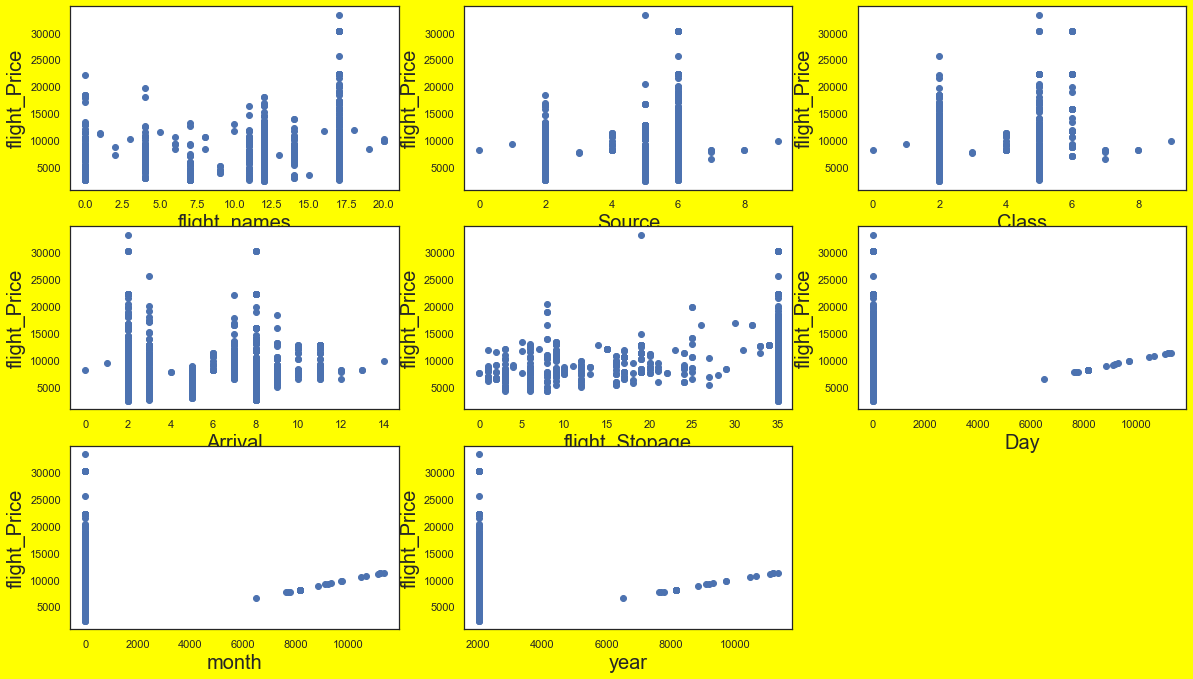

In [20]:
plt.figure(figsize=(20,60),facecolor='yellow')
plotnumber=1
for column in x:
    if plotnumber<=50:
        ax=plt.subplot(15,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('flight_Price',fontsize=20)
        
        plotnumber+=1
        
plt.show()

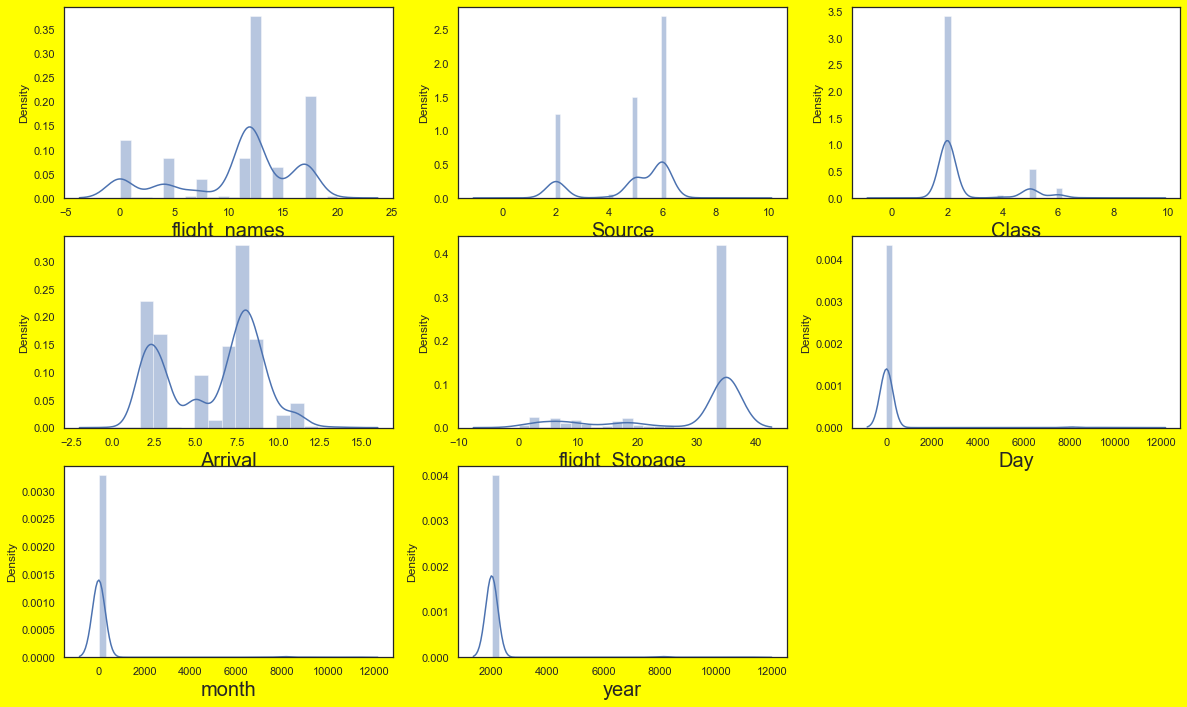

In [21]:
## Lets see how data is distributed.
plt.figure(figsize=(20,50),facecolor='yellow')
plotnumber=1
for column in x:
    if plotnumber<=40:
        ax=plt.subplot(12,3,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
        
        plotnumber+=1
        
plt.show()

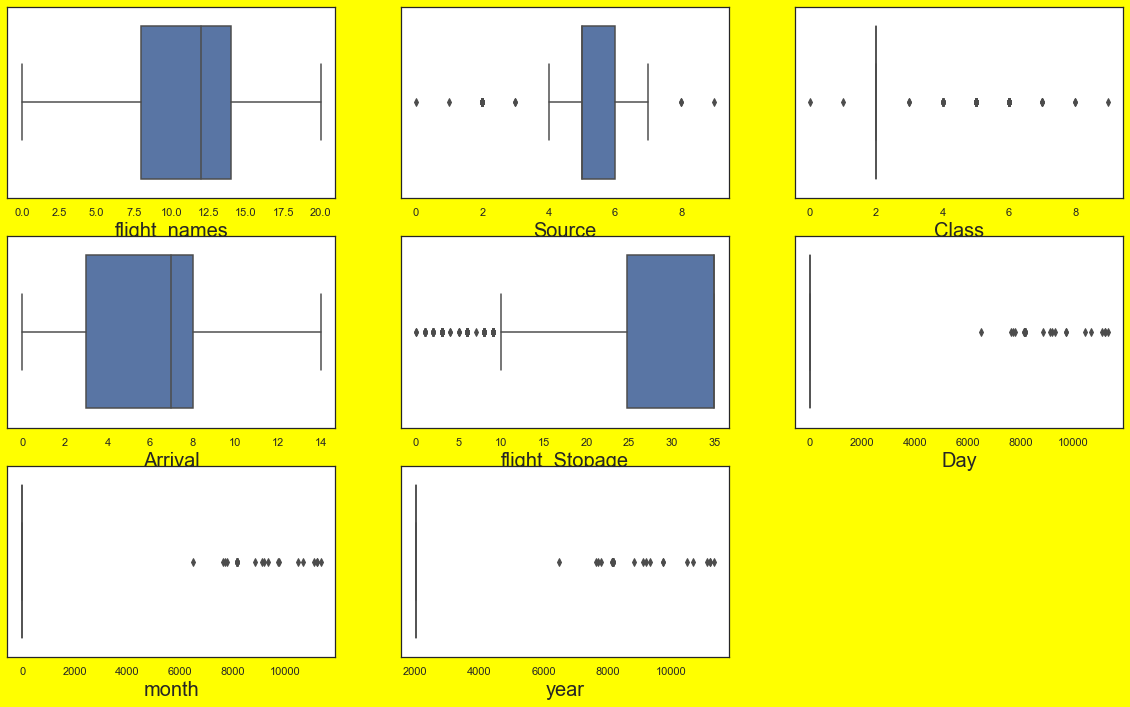

In [22]:
## Lets see how data is distributed and check outliers.
plt.figure(figsize=(20,50),facecolor='yellow')
plotnumber=1
for column in x:
    if plotnumber<=35:
        ax=plt.subplot(12,3,plotnumber)
        sns.boxplot(x[column])
        plt.xlabel(column,fontsize=20)
    
        plotnumber+=1
        
plt.show()

In [23]:
## Lets do scaling to avoid partiality by model on the basis of number size.
from sklearn.preprocessing import StandardScaler
Scaler= StandardScaler()
x_scaled=Scaler.fit_transform(x)

In [24]:

#Creating training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)


In [25]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

In [26]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 2351.351208564704
MSE: 11068063.358152017
RMSE: 3326.8699040016604


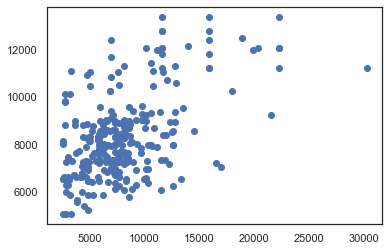

In [27]:
##Lets plot the y_test vs the predictions
plt.scatter(x=y_test,y=pred)

In [28]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)

Text(0, 0.5, 'Predicted Y')

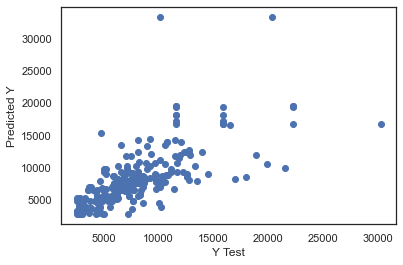

In [29]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [30]:
## We can see we got a straight line. so it is better model than LinearRegression. 
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 1844.9313646016617
MSE: 9586507.44085171
RMSE: 3096.2085590043366


In [31]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(x_train,y_train)
pred=rdr.predict(x_test)

Text(0, 0.5, 'Predicted Y')

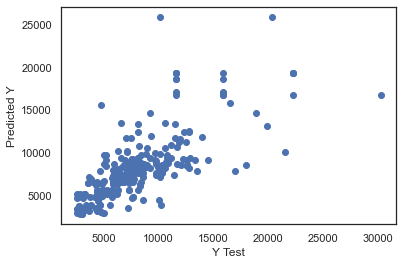

In [32]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')


In [33]:
## We can see we got a straight line. so it is better model than LinearRegression. 
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 1745.2359691039885
MSE: 7756329.032342849
RMSE: 2785.0186771982067


In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge
from sklearn import metrics
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
ls=Lasso()
z=GridSearchCV(ls,parameters)
z.fit(x_train,y_train)
print(z.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [35]:
from sklearn.metrics import r2_score
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.25960583225647316
MSE: 11391282.999064518
MAE: 2406.1331005490856
RMSE: 3375.097479935138


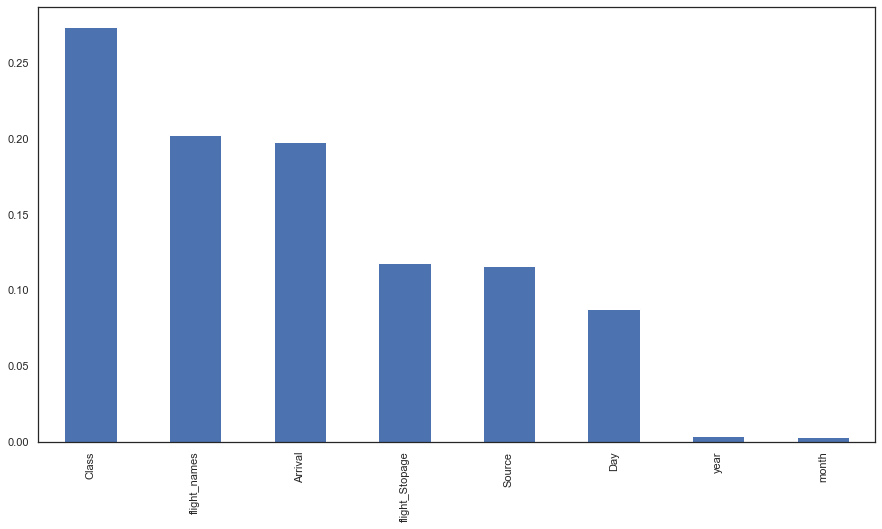

In [36]:
##We can see accuracy score of Random forest is highest.
pd.Series(rdr.feature_importances_, 
         index = x.columns).sort_values(ascending = False).plot(kind = 'bar', 
                                                                figsize = (15,8));

In [37]:
## Conclusion:

## I have done EDA using Pandas and other plotting libraries.

## Also made use of packages like matplotlib, plotly and seaborn to develop better insights about the data.

## I have also seen how preproceesing helps in dealing with missing values and irregualities present in the data.

## I also learnt how to create new features which will in turn help us to better predict the survival.

## I get to know what are the features on which price is highly positively and negatively coorelated with.

## I came to know through analysis which model will be work with better accuracy.

## This project helped me to understand which model to choose first and go step by step to attain results with good accuracy. 

## In this project we can see that Random forest have highist accuracy as RMSE his Lowest

## To acieve this model I have taken 'Flight Price' as my target variable and applied various algorithm to achieve the best model.
## For our both required model Random forest is the most accurate model as per my analysis and assumption..